!pip install simpleai
!pip install network

In [1]:
import networkx as nx
import numpy as np
import random
import copy
from simpleai.search import SearchProblem
from simpleai.search.local import genetic

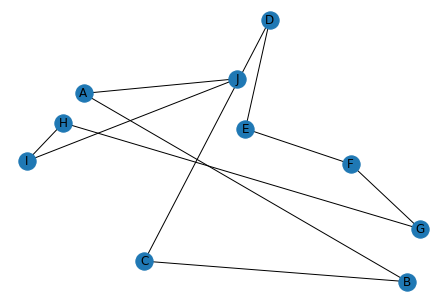

In [2]:
# グラフの初期化
graph = nx.Graph()

# ノード
nodes = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

# ノードの位置
pos ={
  "A": (17, 72),
  "B": (97, 8),
  "C": (32, 15),
  "D": (63, 97),
  "E": (57, 60),
  "F": (83, 48),
  "G": (100, 26),
  "H": (12, 62),
  "I": (3, 49),
  "J": (55, 77)
}

# 経路
route = [("A", "B"), ("B", "C"), ("C", "D"), ("D", "E"), ("E", "F"), ("F", "G"), ("G", "H"), ("H", "I"), ("I", "J"), ("J", "A")]
graph.add_edges_from(route)

# 描画
nx.draw(graph, pos=pos, with_labels=True)

In [3]:
# 経路から個体（遺伝子）へ
def toGene(route):

  destinations = list(copy.deepcopy(graph.nodes))
  gene = []

  for edge in route:
    index = destinations.index(edge[0])
    destinations.pop(index)
    gene.append(index)

  return gene

gene = toGene(route)
print(gene)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
# 個体（遺伝子）から経路へ
def toRoute(gene):
  destinations = list(copy.deepcopy(graph.nodes))
  nodes = []

  for index in gene:
    node = destinations[index]
    destinations.pop(index)
    nodes.append(node)

  route = []

  for i, node in enumerate(nodes):
    edge = ((nodes[i], nodes[(i+1) % len(nodes)]))
    route.append(edge)

  return route

route = toRoute(gene)
print(route)

[('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'G'), ('G', 'H'), ('H', 'I'), ('I', 'J'), ('J', 'A')]


In [5]:
# ランダムに個体を生成
def randomGene():
    destinations = list(copy.deepcopy(graph.nodes))
    gene = []

    for i in range(len(destinations)):
      node = random.choice(destinations)
      index = destinations.index(node)
      destinations.pop(index)
      gene.append(index)

    return gene

gene = randomGene()
print(gene)
print(toRoute(gene))

[4, 8, 7, 2, 0, 4, 2, 2, 0, 0]
[('E', 'J'), ('J', 'I'), ('I', 'C'), ('C', 'A'), ('A', 'H'), ('H', 'F'), ('F', 'G'), ('G', 'B'), ('B', 'D'), ('D', 'E')]


In [6]:
# 経路距離
def distance(route):
  d = 0

  for edge in route:
    pos_head = np.array(pos[edge[0]])
    pos_tail = np.array(pos[edge[1]])
    d += np.linalg.norm(pos_tail - pos_head)

  return d

d = distance(route)
print(f"distance={d}")

distance=557.6889363201603


In [ ]:
class TSProblem(SearchProblem):
    def value(self, state):

      route = toRoute(state)
      value = -1 * distance(route)

      #--------------------
      # 途中経過の出力
      global max_state
      global max_value

      if max_value < value:
        max_state = state
        max_value = value
	print(f"max state: {max_state}({max_value:.3f})")
  #--------------------

  return value